# TASK 2

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
Movies = pd.read_csv('IMDb Movies India.csv', encoding='latin1')
Movies.dropna(inplace=True)
Movies.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [81]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [82]:
Movies = Movies.drop(columns=['Name', 'Actor 2', 'Actor 3'])
Movies.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
8,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave


In [83]:
Movies.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [84]:
Movies["Year"] = Movies.loc[:,"Year"].str.extract(r"(\d{4})")
Movies["Year"] = pd.to_numeric(Movies.loc[:,"Year"])

In [85]:
Movies["Genre"] = Movies.loc[:,"Genre"].str.replace("Musical","Music")

In [86]:
Movies

,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,1997,147 min,"Comedy, Drama, Music",4.7,827,Rahul Rawail,Bobby Deol
6,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
8,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave
...,...,...,...,...,...,...,...
15493,2015,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal
15494,2001,153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor
15503,1989,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi
15505,1999,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar


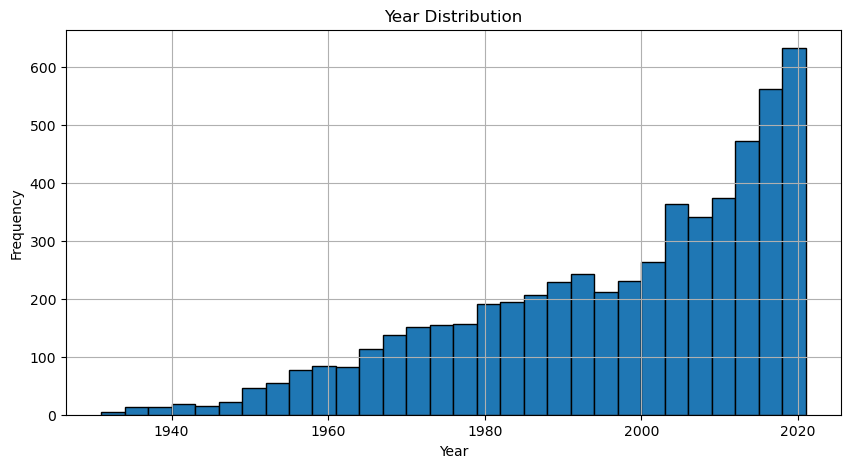

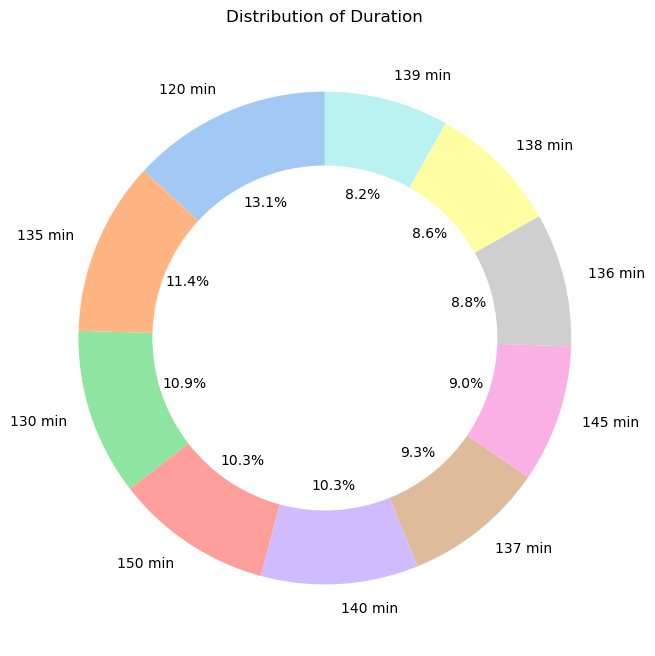

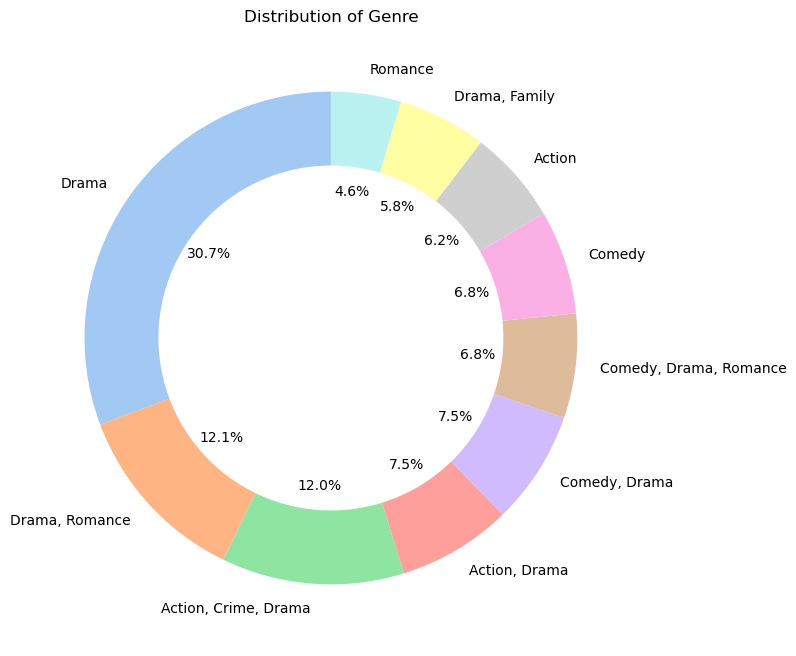

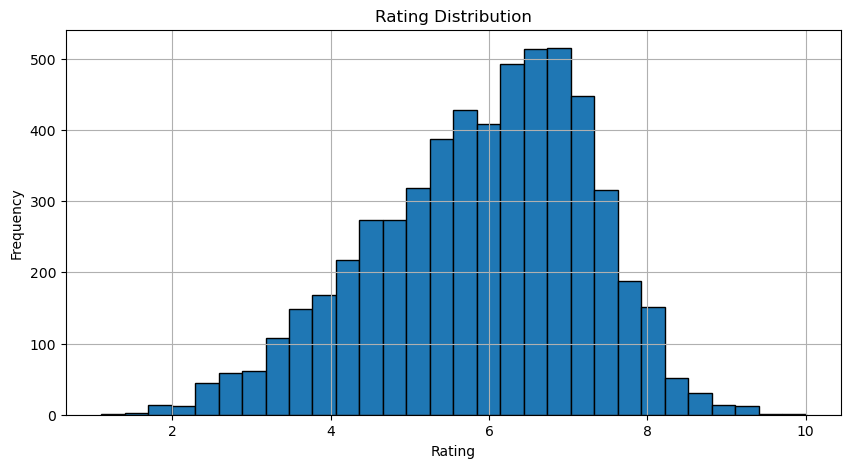

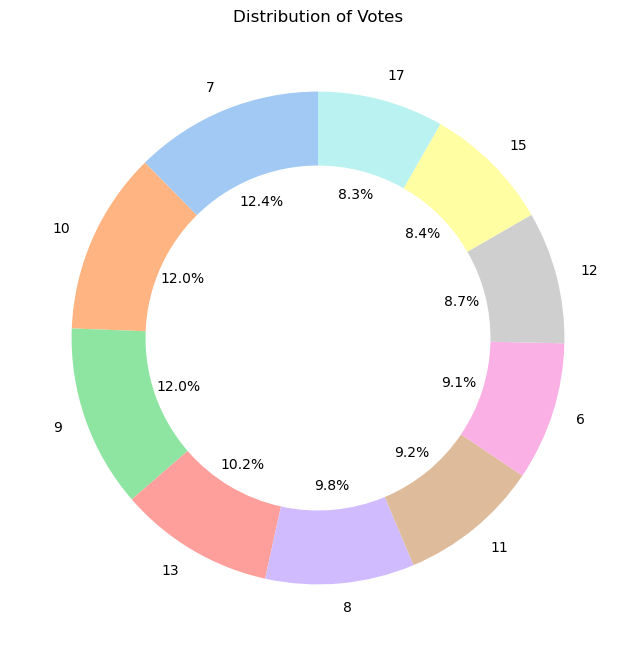

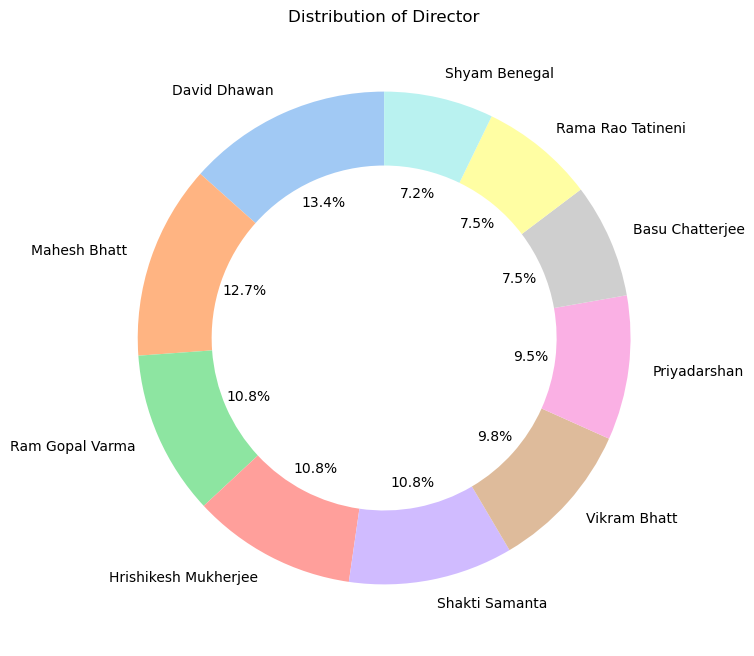

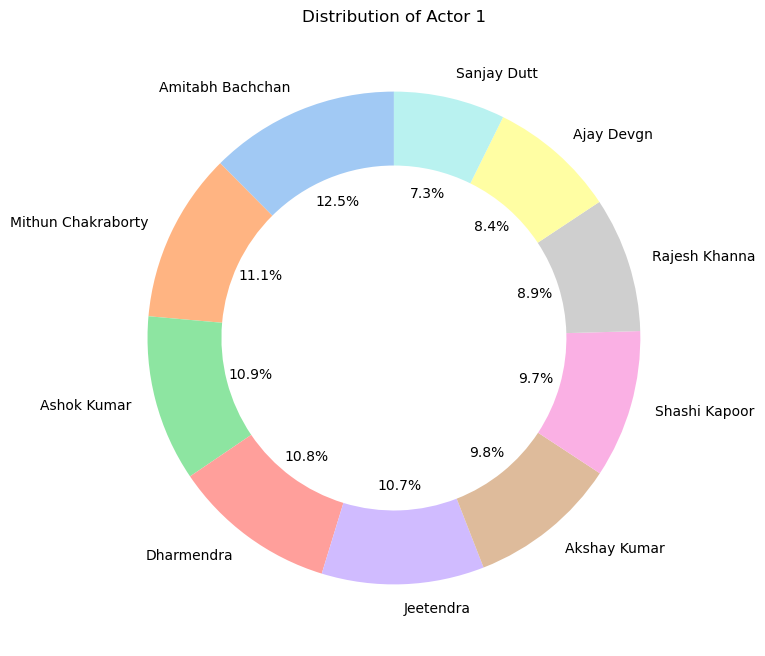

In [87]:
def plot_pie_chart(column):
    plt.figure(figsize=(8, 8))
    Movies[column].value_counts().head(10).plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel'),
        wedgeprops=dict(width=0.3)
    )
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()

def plot_hist_chart(column):
    plt.figure(figsize=(10, 5))
    Movies[column].hist(bins=30, edgecolor='black')
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

for col in Movies.columns:
    if Movies[col].dtype == 'object':
        plot_pie_chart(col)
    else:
        plot_hist_chart(col)

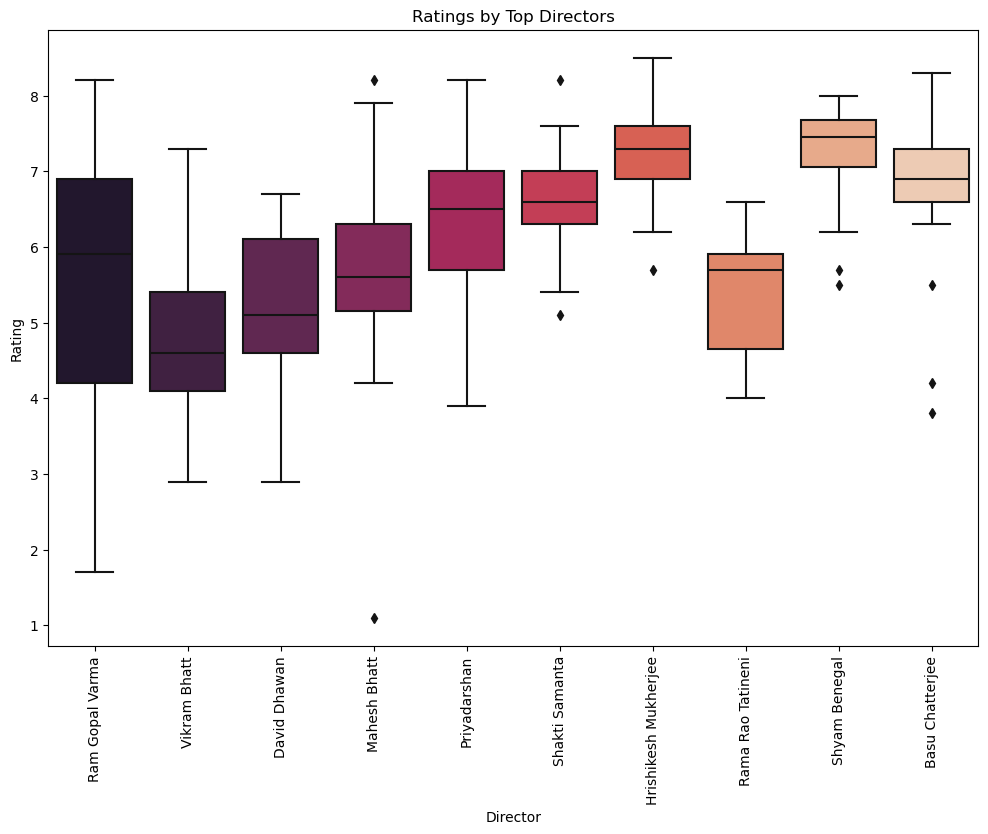

In [88]:
plt.figure(figsize=(12, 8))
TopDirectors=Movies['Director'].value_counts().index[0:10]
sns.boxplot(data=Movies[Movies['Director'].isin(TopDirectors)], x='Director', y='Rating', palette='rocket')

plt.title('Ratings by Top Directors')
plt.xlabel('Director')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

In [90]:
def handleDuration(value):
    value=str(value).split(' ')
    value=value[0]
    return int(value)
Movies['Duration']=Movies['Duration'].apply(handleDuration)

In [91]:
def split_genre_column(Movies,Genre):
   
    Movies['Genre1'] = Movies[Genre].str.split(',', expand=True)[0]
    Movies['Genre2'] = Movies[Genre].str.split(',', expand=True)[1]
    Movies['Genre3'] = Movies[Genre].str.split(',', expand=True)[2]
    return Movies

split_genre_column(Movies,'Genre')

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Drama,None,None
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Comedy,Romance,None
5,1997,147,"Comedy, Drama, Music",4.7,827,Rahul Rawail,Bobby Deol,Comedy,Drama,Music
6,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Drama,Romance,War
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Horror,Mystery,Thriller
...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Drama,None,None
15494,2001,153,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Biography,Drama,History
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Action,Crime,Drama
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Action,Drama,None


In [92]:
Movies['Genre1 encoded'] =round(Movies.groupby('Genre1')['Rating'].transform('mean'),1)
Movies['Genre2 encoded']=round(Movies.groupby('Genre2')['Rating'].transform('mean'),1)
Movies['Genre3 encoded'] =round(Movies.groupby('Genre3')['Rating'].transform('mean'),1)
Movies['Votes encoded'] =round(Movies.groupby('Votes')['Rating'].transform('mean'), 1)
Movies['Director encoded']= round(Movies.groupby('Director')['Rating'].transform('mean'), 1)
Movies['Actor 1 encoded']= round(Movies.groupby('Actor 1')['Rating'].transform('mean'), 1)
Movies.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3,Genre1 encoded,Genre2 encoded,Genre3 encoded,Votes encoded,Director encoded,Actor 1 encoded
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Drama,None,None,6.2,NaN,NaN,5.6,7.0,6.8
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Comedy,Romance,None,5.8,5.9,NaN,5.6,4.4,5.4
5,1997,147,"Comedy, Drama, Music",4.7,827,Rahul Rawail,Bobby Deol,Comedy,Drama,Music,5.8,5.9,6.0,4.8,5.3,4.8
6,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Drama,Romance,War,6.2,5.9,6.3,7.4,7.4,5.4
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Horror,Mystery,Thriller,4.7,5.7,5.7,6.6,5.6,5.6


In [93]:
Movies.drop(columns=['Votes','Director','Actor 1','Genre','Genre2','Genre3'],inplace=True)
Movies['Rating']=round(Movies['Rating'],1)

In [94]:
Movies

,Year,Duration,Rating,Genre1,Genre1 encoded,Genre2 encoded,Genre3 encoded,Votes encoded,Director encoded,Actor 1 encoded
1,2019,109,7.0,Drama,6.2,NaN,NaN,5.6,7.0,6.8
3,2019,110,4.4,Comedy,5.8,5.9,NaN,5.6,4.4,5.4
5,1997,147,4.7,Comedy,5.8,5.9,6.0,4.8,5.3,4.8
6,2005,142,7.4,Drama,6.2,5.9,6.3,7.4,7.4,5.4
8,2012,82,5.6,Horror,4.7,5.7,5.7,6.6,5.6,5.6
...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,6.1,Drama,6.2,NaN,NaN,6.1,6.1,6.7
15494,2001,153,6.2,Biography,6.7,5.9,7.0,6.2,7.2,4.2
15503,1989,125,5.8,Action,5.5,5.7,5.8,5.9,6.3,6.3
15505,1999,129,4.5,Action,5.5,5.9,NaN,5.9,5.2,5.5


In [95]:
Movies.drop(columns=['Genre2 encoded','Genre3 encoded'],inplace=True)
Movies

,Year,Duration,Rating,Genre1,Genre1 encoded,Votes encoded,Director encoded,Actor 1 encoded
1,2019,109,7.0,Drama,6.2,5.6,7.0,6.8
3,2019,110,4.4,Comedy,5.8,5.6,4.4,5.4
5,1997,147,4.7,Comedy,5.8,4.8,5.3,4.8
6,2005,142,7.4,Drama,6.2,7.4,7.4,5.4
8,2012,82,5.6,Horror,4.7,6.6,5.6,5.6
...,...,...,...,...,...,...,...,...
15493,2015,115,6.1,Drama,6.2,6.1,6.1,6.7
15494,2001,153,6.2,Biography,6.7,6.2,7.2,4.2
15503,1989,125,5.8,Action,5.5,5.9,6.3,6.3
15505,1999,129,4.5,Action,5.5,5.9,5.2,5.5


In [96]:
print(Movies.columns)

Index(['Year', 'Duration', 'Rating', 'Genre1', 'Genre1 encoded',
       'Votes encoded', 'Director encoded', 'Actor 1 encoded'],
      dtype='object')


In [97]:
Movies.drop(columns=['Genre1'],inplace=True)
Movies

,Year,Duration,Rating,Genre1 encoded,Votes encoded,Director encoded,Actor 1 encoded
1,2019,109,7.0,6.2,5.6,7.0,6.8
3,2019,110,4.4,5.8,5.6,4.4,5.4
5,1997,147,4.7,5.8,4.8,5.3,4.8
6,2005,142,7.4,6.2,7.4,7.4,5.4
8,2012,82,5.6,4.7,6.6,5.6,5.6
...,...,...,...,...,...,...,...
15493,2015,115,6.1,6.2,6.1,6.1,6.7
15494,2001,153,6.2,6.7,6.2,7.2,4.2
15503,1989,125,5.8,5.5,5.9,6.3,6.3
15505,1999,129,4.5,5.5,5.9,5.2,5.5


In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

categorical_features = ['Genre1 encoded', 'Director encoded', 'Actor 1 encoded']
numerical_features = ['Year', 'Duration', 'Votes encoded']  

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X = Movies.drop("Rating", axis=1)
Y = Movies["Rating"]

Y = Y.dropna()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=52)

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', LinearRegression())])

model.fit(X_train, Y_train)

X_test_prediction = model.predict(X_test)
mse = mean_squared_error(Y_test, X_test_prediction)
r2 = r2_score(Y_test, X_test_prediction)

print(f"Linear Regression - Mean Squared Error (MSE): {mse:.2f}")
print(f"Linear Regression - R-squared score: {r2:.2f}")

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
model_DT = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', DecisionTreeRegressor(random_state=42))])

model_DT.fit(X_train, Y_train)
X_test_prediction_DT = model_DT.predict(X_test)
mse_DT = mean_squared_error(Y_test, X_test_prediction_DT)
r2_DT = r2_score(Y_test, X_test_prediction_DT)

print(f"Decision Tree Regressor - Mean Squared Error (MSE): {mse_DT:.2f}")
print(f"Decision Tree Regressor - R-squared score: {r2_DT:.2f}")

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=50)
model_RF = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor(n_estimators=100, random_state=50))])

model_RF.fit(X_train, Y_train)
X_test_prediction_RF = model_RF.predict(X_test)
mse_RF = mean_squared_error(Y_test, X_test_prediction_RF)
r2_RF = r2_score(Y_test, X_test_prediction_RF)

print(f"Random Forest Regressor - Mean Squared Error (MSE): {mse_RF:.2f}")
print(f"Random Forest Regressor - R-squared score: {r2_RF:.2f}")


Linear Regression - Mean Squared Error (MSE): 0.45
Linear Regression - R-squared score: 0.76
Decision Tree Regressor - Mean Squared Error (MSE): 1.14
Decision Tree Regressor - R-squared score: 0.41
Random Forest Regressor - Mean Squared Error (MSE): 0.62
Random Forest Regressor - R-squared score: 0.68
